# **Descriptive Analysis**

This notebook contains aggregated data analysis producing:
1. **Basic Descriptive Stats**  
2. **Subreddit Stats**  
3. **Keyword Frequencies**  
4. **Top 10 Highest-Scoring Posts**  
5. **Violin Plots** of Submission Score & Comment Counts (clipped)  
6. **Monthly Line Chart** of Posts Over Time

In [1]:
# ------------------------------------------------------------
# Imports
# ------------------------------------------------------------
import json
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict, Counter
from datetime import datetime
import os

from IPython.display import display_html

print("Libraries imported successfully.")

Libraries imported successfully.


## 1) Load Aggregated Data

In [3]:
aggregated_path = r"C:\Users\laure\Desktop\dissertation_notebook\Data\aggregated_raw_reddit_data.json"
with open(aggregated_path, "r", encoding="utf-8") as f:
    data = json.load(f)

print(f"Loaded {len(data)} aggregated posts (each with its comments).")

Loaded 575 aggregated posts (each with its comments).


## 2) Basic Descriptive Stats & Subreddit Stats

In [4]:
# Extrct comment counts and submission scores from posts
comment_counts = [len(post["comments"]) for post in data]
submission_scores = [post["submission_score"] for post in data]

# Calculate basic totals
total_posts = len(data)
total_comments = sum(comment_counts)

# Calculate descriptive statistics for comments and scores
avg_comments = statistics.mean(comment_counts) if total_posts else 0
median_comments = statistics.median(comment_counts) if total_posts else 0
avg_scores = statistics.mean(submission_scores) if total_posts else 0
median_scores = statistics.median(submission_scores) if total_posts else 0

# Prepare data for the basic statistics table
stats_data = {
    "Metric": [
        "Total Posts",
        "Total Comments",
        "Average Comments per Post", 
        "Median Comments per Post",
        "Average Submission Score",
        "Median Submission Score"
    ],
    "Value": [
        total_posts,
        total_comments,
        float(f"{avg_comments:.2f}"),
        median_comments,
        float(f"{avg_scores:.2f}"),
        median_scores,
    ]
}
df_stats = pd.DataFrame(stats_data).set_index("Metric")

# Style the basic statistics table
df_stats_styled = (
    df_stats
    .style
    .format({"Value": "{:.2f}"})
    .set_caption("<h3><b>Basic Descriptive Statistics</b></h3>")
)
table_stats = df_stats_styled.set_table_attributes(
    'style="display:inline-block; width:45%; vertical-align:top;"'
).to_html()

# Analyse subreddit statistics
subreddit_counts = Counter(post["subreddit"] for post in data)
subreddit_scores_map = defaultdict(list)
for post in data:
    subreddit_scores_map[post["subreddit"]].append(post["submission_score"])

# Create and style the subreddit statistics table
df_subreddits = pd.DataFrame({
    "Subreddit": list(subreddit_counts.keys()),
    "Posts": list(subreddit_counts.values()),
    "Avg Score": [
        np.mean(subreddit_scores_map[sub]) for sub in subreddit_counts.keys()
    ],
}).sort_values("Posts", ascending=False).set_index("Subreddit")

df_subreddits_styled = (
    df_subreddits
    .style
    .format({"Posts": "{:.0f}", "Avg Score": "{:.2f}"})
    .set_caption("<h3><b>Subreddit Stats</b></h3>")
)
table_subs = df_subreddits_styled.set_table_attributes(
    'style="display:inline-block; width:45%; vertical-align:top; margin-left:2%;"'
).to_html()

# Display both tables side by side
display_html(table_stats + table_subs, raw=True)

Basic Descriptive Statistics 
 
 
   
 Value 
 
 
 Metric 
   
 
 
 
 
 Total Posts 
 575.00 
 
 
 Total Comments 
 5906.00 
 
 
 Average Comments per Post 
 10.27 
 
 
 Median Comments per Post 
 5.00 
 
 
 Average Submission Score 
 168.17 
 
 
 Median Submission Score 
 52.00 
 
 
 

 
 Subreddit Stats 
 
 
   
 Posts 
 Avg Score 
 
 
 Subreddit 
   
   
 
 
 
 
 neurodiversity 
 104 
 55.33 
 
 
 AutisticAdults 
 102 
 76.04 
 
 
 autism 
 102 
 353.57 
 
 
 AutismInWomen 
 90 
 364.26 
 
 
 AutisticWithADHD 
 75 
 71.84 
 
 
 Autism_Parenting 
 74 
 53.41 
 
 
 AskAutism 
 16 
 17.56 
 
 
 aspiememes 
 12 
 393.08

## 3) Keyword Frequecy Visual

,Count
Keyword,
diagnosis,223
therapy,116
ABA,58
ADHD,45
treatment,15
psychiatrist,15
burnout,10
medication,9
dentist,8

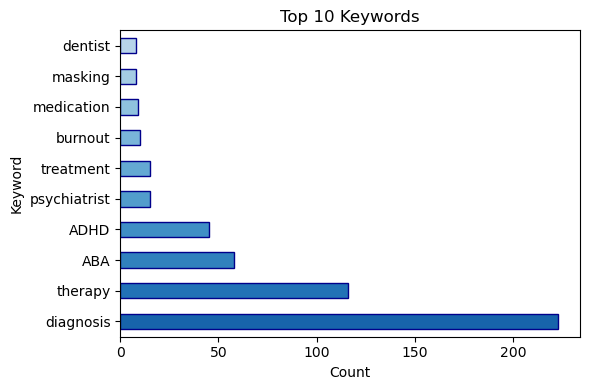

In [11]:
# Extract and count keywords
keywords = [post["keyword"] for post in data]
keyword_counts = Counter(keywords)

# Create DataFrame of top 10 keywords
df_keywords = pd.DataFrame({
    "Keyword": list(keyword_counts.keys()),
    "Count": list(keyword_counts.values())
}).sort_values("Count", ascending=False).head(10)

df_keywords_sorted = df_keywords.sort_values("Count")

# 1) Convert the styled DataFrame to inline-block HTML
df_keywords_styled = (
    df_keywords
    .set_index("Keyword")
    .style
    .format({"Count": "{:.0f}"})
    .set_caption("<h3><b>Top 10 Keywords</b></h3>")
)

table_html = (
    df_keywords_styled
    .set_table_attributes('style="display:inline-block; width:45%; vertical-align:top;"')
    .to_html()
)

# 2) Build the figure (horizontal bar chart)
fig, ax = plt.subplots(figsize=(6, 4))
cmap = plt.colormaps["Blues"]
num_kw = len(df_keywords_sorted)
color_vals = np.linspace(0.3, 0.8, num_kw)
bar_colors = [cmap(v) for v in color_vals]

df_keywords_sorted.set_index("Keyword")["Count"].plot.barh(
    ax=ax,
    color=bar_colors,
    edgecolor="darkblue",
    title="Top 10 Keywords",
    legend=False
)
ax.set_xlabel("Count")
ax.invert_yaxis()
plt.tight_layout()

# 3) Capture figure as a PNG in memory and convert to base64
buf = io.BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight')
buf.seek(0)
encoded = base64.b64encode(buf.read()).decode()

# 4) Create an <img> tag with inline-block style
img_html = f'''
<img src="data:image/png;base64,{encoded}" 
     style="display:inline-block; width:50%; vertical-align:top; margin-left:2%;" />
'''

# 5) Display table & figure side by side
display_html(table_html + img_html, raw=True)

plt.close(fig)

#### 4) Top 10 Highest-Scoring Posts

In [8]:
# Sort posts by score and display top 10
top_posts = sorted(data, key=lambda x: x["submission_score"], reverse=True)[:10]
df_top_posts = pd.DataFrame([
    {
        "Title": p["title"][:80] + ("..." if len(p["title"]) > 80 else ""),
        "Subreddit": p["subreddit"],
        "Score": p["submission_score"]
    }
    for p in top_posts
]).set_index("Title")

# Apply styling with caption
df_top_posts_styled = (
    df_top_posts
    .style
    .format({"Score": "{:.0f}"})  # Round scores to whole numbers
    .set_caption("<h3><b>Top 10 Highest-Scoring Posts</b></h3>")
)

# Present the formatted table
display(df_top_posts_styled)

,Subreddit,Score
Title,,
My stupid pediatrician just told my wife that the MMR vaccine may trigger autism...,autism,2507.00
A logical method for evaluating self diagnosis and preventing gatekeeping.,aspiememes,2285.00
Let’s talk about ABA therapy. ABA posts outside this thread will be removed.,autism,1999.00
I finally received my diagnosis,autism,1982.00
Hubby got me a cake to celebrate my official diagnosis. 💜,AutismInWomen,1884.00
Ended up yelling “I HAVE AUTISM!” In my dentists office today.,autism,1867.00
"My psycholgist said my previous autism diagnosis was wrong, and here's why.",AutismInWomen,1527.00
"I'm so tired of seeing lists of ""ADHD"" symptoms and it's just all autism",autism,1457.00
"Husband's response to my autism diagnosis: ""Wow, I sure know how to pick 'em.""",AutismInWomen,1259.00


## 5) Violin Plots (Clipped) for Submission Scores & Comment Counts

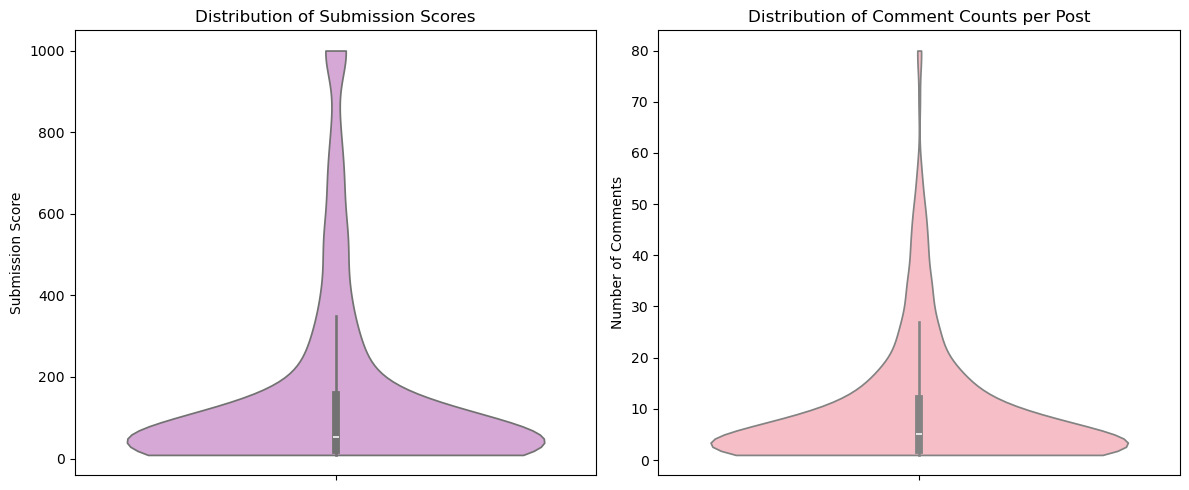

In [ ]:
# Set thresholds to clip extreme values for better visualisation
SCORE_CLIP_THRESHOLD = 1000
COMMENT_CLIP_THRESHOLD = 80

# Clip values to reduce impact of outliers
submission_scores_clipped = [min(s, SCORE_CLIP_THRESHOLD) for s in submission_scores]
comment_counts_clipped    = [min(c, COMMENT_CLIP_THRESHOLD) for c in comment_counts]

# Create figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Submission scores distribution
sns.violinplot(
    ax=axes[0],
    y=submission_scores_clipped,
    color="plum",
    inner="box",
    cut=0
)
axes[0].set_title("Distribution of Submission Scores")
axes[0].set_ylabel("Submission Score")

# Right plot: Comment counts distribution 
sns.violinplot(
    ax=axes[1],
    y=comment_counts_clipped,
    color="lightpink",
    inner="box",
    cut=0
)
axes[1].set_title("Distribution of Comment Counts per Post")
axes[1].set_ylabel("Number of Comments")

# Adjust layout and display
plt.tight_layout()
plt.show()

## 6) Posts by Year-Month

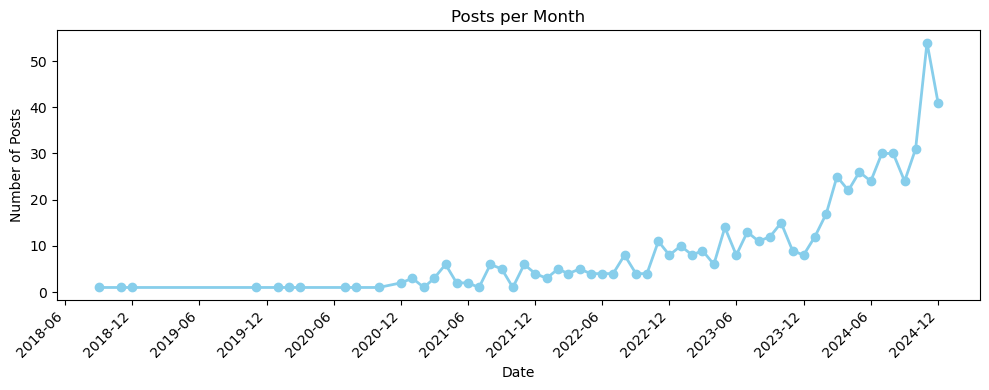

In [ ]:
# Tally the posts by month
monthly_counts = Counter()
for post in data:
    dt_str = post["created_utc"]
    dt = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")
    ym = dt.strftime("%Y-%m")
    monthly_counts[ym] += 1

# Convert to DataFrame and format dates properly
df_monthly = pd.DataFrame(
    sorted(monthly_counts.items(), key=lambda x: x[0]),
    columns=["Year-Month", "Posts"]
)
df_monthly["Date"] = pd.to_datetime(df_monthly["Year-Month"], format="%Y-%m")

# Create line plot
plt.figure(figsize=(10, 4))
plt.plot(df_monthly["Date"], df_monthly["Posts"], marker="o", color="skyblue", linewidth=2)
plt.title("Posts per Month")
plt.xlabel("Date")
plt.ylabel("Number of Posts")

# Configure x-axis to show dates properly
import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 6 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.tight_layout()
plt.show()

## References

**Reference:**  
Hunter, J. D. (2007) *Matplotlib: A 2D Graphics Environment* [computer program]. *Computing in Science & Engineering*, 9(3), pp. 90–95.  
Available from: [https://matplotlib.org/](https://matplotlib.org/) [Accessed 12 May 2024].

**Git Repo:**  
- [Matplotlib GitHub](https://github.com/matplotlib/matplotlib)

**Reference:**  
Harris, C. R., Millman, K. J., van der Walt, S. J. et al. (2020) *Array programming with NumPy* [computer program]. *Nature*, 585, pp. 357–362 (v3.10.0).  
Available from: [https://numpy.org/](https://numpy.org/) [Accessed 12 May 2024].

**Git Repo:**  
- [NumPy GitHub](https://github.com/numpy/numpy)

**Reference:**  
Pandas Development Team (2024) *pandas: Powerful data structures for data analysis v2.2.3* [computer program].  
Available from: [https://pandas.pydata.org/](https://pandas.pydata.org/) [Accessed 11 May 2024].

**Git Repo:**  
- [Pandas GitHub](https://github.com/pandas-dev/pandas)

**Reference:**  
Waskom, M. (2024) *seaborn: Statistical data visualization v0.13.2* [computer program].  
Available from: [https://joss.theoj.org/papers/10.21105/joss.03021](https://joss.theoj.org/papers/10.21105/joss.03021) [Accessed 13 May 2024].

**Git Repo:**  
- [Seaborn GitHub](https://github.com/mwaskom/seaborn)